# Chapter 1: From finite differences to spectral methods for periodic functions

Here we discuss
1. Finite difference (FD) approximations to the derivative of periodic functions
2. How to construct FD formulas using interpolating polynomials
3. How to analyse the accuracy of FD approximations using Taylor's theorem
4. Differentiation matrices
5. An example of exponentially fast convergence of a spectral method

## Finite difference approximations to the derivative

Consider a function $f(x)$ that is $2\pi$-periodic, i.e., $f(x+2\pi) = f(x)$ for $x \in \mathbb{R}$.  Suppose we have function values at equally spaced points on the interval $[0, 2\pi)$, i.e., we have $f(x_j)$, where
$$
x_j = jh, \qquad h = \frac{2\pi}{n}, \qquad j = 0, \ldots, n-1.
$$
How can we approximate $f'(x_j)$?

Recall that
$$
f'(x_j) = \lim_{\epsilon \to 0} \frac{f(x_j +\epsilon) - f(x_j)}{\epsilon},
$$
this suggests that for small $h$,
$$
f'(x_j) \approx \frac{f(x_j+h)-f(x_j)}{h} = \frac{f(x_{j+1})-f(x_j)}{h}. 
$$
This is an example of a **finite difference** approximation to a derivative of a function.  This particular approximation is known as a *forward difference* approximation (or formula).  Replacing $h$ with $-h$, we obtain a *backward difference* formula
$$
f'(x_j) \approx \frac{f(x_{j})-f(x_{j-1})}{h}.
$$
Finite difference formulae are used to design finite difference methods for PDEs, as we'll see later in this module.

Here is the *central difference* formula
$$
f'(x_j) \approx \frac{f(x_{j+1})-f(x_{j-1})}{2h}.
$$

To analyse the accuracy of finite difference formulae, we recall Taylor's Theorem:

**Theorem (Taylor's Theorem)**  Let $a<b$, $n$ a positive integer, $x\in[a,b]$ and $f: [a,b]\to\mathbb{R}$ be a continuous function such that the derivatives up to order $n+1$ (inclusive) exist at every point in $[a,b]$. Then, for every $x\in[a,b]$, there exists a $\xi$ between $x$ and $x+h$ with $x+h\in[a,b]$, such that
$$
f(x+h)=\sum_{k=0}^{n}\frac{h^k}{k!}f^{(k)}(x)+\frac{h^{n+1}}{(n+1)!}f^{(n+1)}(\xi).
$$

**Corollary (central difference is 2nd order accurate)** Suppose $f \in C^3[x_{j-1},x_{j+1}]$ (i.e., the derivatives of orders $0, 1, 2, 3$ are continuous on $[x_{j-1},x_{j+1}]$), then 
$$
\left\vert\frac{f(x_{j+1})-f(x_{j-1})}{2h} - f'(x_j) \right\vert \leq \frac{M}{6}h^2, 
$$
where $M = \sup_{x \in [x_{j-1}, x_{j+1}]} \vert f'''(x) \vert$.

**Proof**

It follows from Taylor's theorem that there exists an $\xi_1 \in [x_{j}, x_{j+1}]$ such that 
$$
f(x_{j+ 1}) = f(x_{j + 1}) = f(x_j + h) = f(x_j) + h f'(x_j) + \frac{h^2}{2}f''(x_j) + \frac{h^3}{6}f'''(\xi_1).
$$
Similarly, there exists an $\xi_2 \in [x_{j-1}, x_{j}]$ such that 
$$
f(x_{j- 1}) = f(x_j) - h f'(x_j) + \frac{h}{2}f''(x_j) - \frac{h^3}{6}f'''(\xi_2).
$$
Therefore,
$$
\frac{f(x_{j+1})-f(x_{j-1})}{2h} = f'(x_j) + \frac{h^2}{12}\left( f'''(\xi_1) + f'''(\xi_2)   \right),
$$
from which the result follows.
$\blacksquare$

Recalling the definition of big O notation, we can write
$$
f'(x_j) = \frac{f(x_{j+1})-f(x_{j-1})}{2h} + \mathcal{O}(h^2), \qquad h \to 0,
$$
and we say that the central difference approximation is second order accurate.  Similarly, we can show that the forward and backward difference approximations are first order approximations of the derivative.

## Finite differences via Lagrange interpolating polynomials

How can we construct finite difference approximations?  One approach is via interpolating polynomials (aka polynomial interpolants). 

**Definition (Lagrange interpolating polynomial)** Let $x_0, \ldots, x_{N-1}$ be a set of $N$ distinct nodes in an interval $[a, b]$ ($x_j \in [a, b]$, $j = 0, \ldots, N-1$) and let
$$
\ell_{j}(x) = \frac{(x-x_0)}{(x_j - x_0)}\frac{(x-x_1)}{(x_j - x_1)}\cdots \frac{(x-x_{j-1})}{(x_j - x_{j-1})}\frac{(x-x_{j+1})}{(x_j - x_{j+1})}\cdots\frac{(x-x_{N-1})}{(x_j - x_{N-1})}.
$$
The *Lagrange interpolating polynomial* of the function $f(x)$ is defined as 
$$
p_N(x) = \sum_{j=0}^{N-1} \ell_j(x) f(x_j).
$$

It is important to note that $p_N(x)$ is a polynomial of degree $\leq N-1$ and it interpolates $f$ at the nodes $x_0, \ldots, x_{N-1}$, meaning
$$
p_N(x_j) = f(x_j), \qquad j = 0, \ldots, N-1.
$$
The interpolation property follows from the fact 
$$
\ell_j(x_k) = \begin{cases}
1 & \text{if } k = j \\
0 & \text{if } k \neq j
\end{cases}.
$$
In fact, $p_N(x)$ is the unique polynomial of degree $\leq N-1$ that interpolates $f$ at $x_0, \ldots, x_{N-1}$.

Here is an example of a Lagrange interpolating polynomial:

But it turns out we can also construct the interpolatory polynomial directly.
We will use the following with equal $1$ at one grid point
and are zero at the others:

**Definition (Lagrange basis polynomial)** The _Lagrange basis polynomial_ is defined as
$$
ℓ_k(x) := ∏_{j ≠ k} {x-x_j \over x_k - x_j} =  {(x-x_1) ⋯(x-x_{k-1})(x-x_{k+1}) ⋯ (x-x_n) \over (x_k - x_1) ⋯ (x_k - x_{k-1}) (x_k - x_{k+1}) ⋯ (x_k - x_n)}
$$

Plugging in the grid points verifies the following:

**Proposition (delta interpolation)**
$$
ℓ_k(x_j) = δ_{kj}
$$

We can use these to construct the interpolatory polynomial:

**Theorem (Lagrange interpolation)**
The unique  polynomial of degree at most $n-1$ that interpolates $f$ at $n$ distinct
points $x_j$ is:
$$
p(x) = f(x_1) ℓ_1(x) + ⋯ + f(x_n) ℓ_n(x)
$$

**Proof**
Note that
$$
p(x_j) = ∑_{j=1}^n f(x_j) ℓ_k(x_j) = f(x_j)
$$
so we just need to show it is unique. Suppose $p̃(x)$ is a  polynomial
of degree at most $n-1$
that also interpolates $f$. Then $p̃ - p$ vanishes at $n$ distinct points.
Thus by the fundamental theorem of algebra it must be zero.


$\blacksquare$


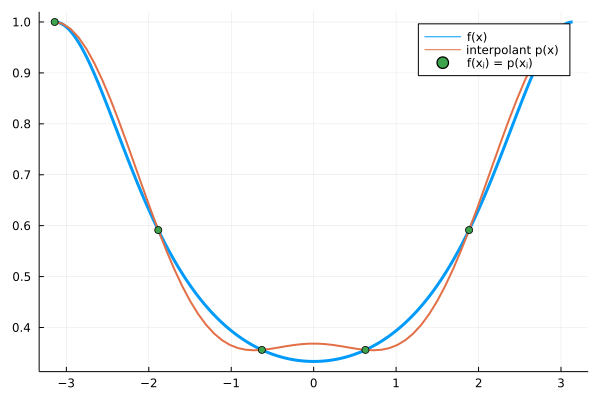

In [2]:
using ApproxFun, Plots, LinearAlgebra, SparseArrays, ToeplitzMatrices
# plot a 2π-periodic function f
f = Fun(x -> 1/(cos(x)+2),-π..π)
plot(f,lw=3,label="f(x)")
# construct the Lagrange interpolating polynomial through N equally spaced points and plot it
N = 5
p = Fun(f,Fourier(-π..π),N) # interpolant
plot!(p,lw=2,label="interpolant p(x)")
# show the interpolant interpolates f(x) at the interpolation nodes
h = 2π/N;
xn = -π:h:π-h # the interpolation nodes
scatter!(xn,p.(xn);label="f(xⱼ) = p(xⱼ)")

## Differentiation matrices

**Example** Construct the central difference approximation as follows: (i) construct the polynomial $p(x)$ that interpolates $f(x)$  at the three equally spaced points $x_{j-1}, x_j, x_{j+1}$; (ii) use $p(x)$ to approximate  $f'$ at $x_j$.

Using the formula for the Lagrange interpolating polynomial given above, it follows that (verify!)
$$
p(x) = \frac{(x-x_{j})(x-x_{j+1})}{2h^2}f(x_{j-1}) - \frac{(x-x_{j-1})(x-x_{j+1})}{h^2}f(x_{j}) + \frac{(x-x_{j-1})(x-x_{j})}{2h^2}f(x_{j+1})
$$
and
$$
p'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{2h}  \approx f'(x_j),
$$
which is the central difference approximation we've seen before.

Collecting the approximations $p'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{2h}  \approx f'(x_j)$ for $j = 0, \ldots, N-1$ in a vector and using the fact that $f(x_{j+N}) = f_{j+N} = f_j$, we obtain
$$
\left(
\begin{array}{c c c c c}
f'(x_0) \\
  \\
\vdots  \\
  \\
f'(x_{N-1})
\end{array}
\right) \approx 
\left(
\begin{array}{c c c c c}
p'(x_0) \\
  \\
\vdots  \\
  \\
p'(x_{N-1})
\end{array}
\right) = \frac{1}{h}
\left(
\begin{array}{c c c c c}
0 & \frac{1}{2} &   &   &  -\frac{1}{2} \\
-\frac{1}{2} & 0 & \ddots &  &  \\
   &   & \ddots &  &   \\
   &   & \ddots & 0 &  \frac{1}{2} \\
 \frac{1}{2}  &   &   & -\frac{1}{2} & 0
\end{array}
\right)
\left(
\begin{array}{c c c c c}
f_0 \\
  \\
\vdots  \\
  \\
f_{N-1}
\end{array}
\right).
$$
Note that omitted entries of the matrix are zero.

The above matrix is an example of a **differentiation matrix**.  This differentiation matrix is a skew-symmetric ($A^{\top} = -A$), Toeplitz matrix (a matrix that is constant along its diagonals) and it is also a [circulant matrix](https://en.wikipedia.org/wiki/Circulant_matrix).  

We can use the following command in Julia to create sparse versions of the differentiation matrices

In [3]:
N = 10
spdiagm(1=>fill(0.5,N-1),-1=>fill(-0.5,N-1),N-1=>fill(-0.5,1),1-N=>fill(0.5,1))

10×10 SparseMatrixCSC{Float64, Int64} with 20 stored entries:
   ⋅    0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -0.5
 -0.5    ⋅    0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -0.5    ⋅    0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -0.5    ⋅    0.5    ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -0.5    ⋅    0.5    ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -0.5    ⋅    0.5    ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -0.5    ⋅    0.5    ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -0.5    ⋅    0.5    ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -0.5    ⋅    0.5
  0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   -0.5    ⋅ 

For various values of $N$, let's compute the maximum error of the central difference approximation to the derivative at the points $x_j = -\pi + jh$ with $j = 0, \ldots, N-1$ and $h = 2\pi/N$ for the function $f(x) = 1/(2 + \cos(x))$:

  2.190789 seconds (1.40 M allocations: 1.075 GiB, 30.43% gc time, 36.68% compilation time)


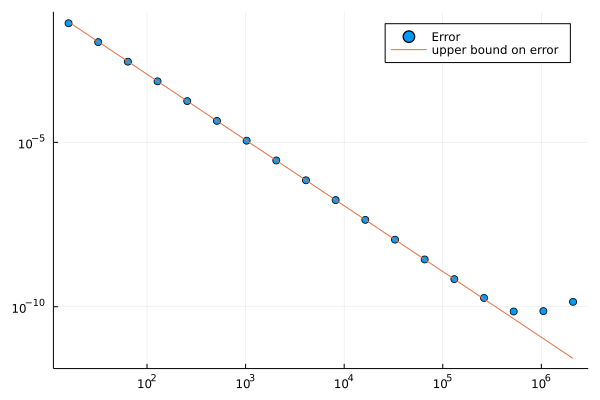

In [4]:
f = x -> 1/(2 + cos(x))
Df = x -> sin(x)/(2 + cos(x))^2  # derivative
# compute the errors
@time begin
errs = 
[( h = 2π/N;
   # differentiation matrix:
   Dₘ = 1/h*spdiagm(1=>fill(0.5,N-1),-1=>fill(-0.5,N-1),N-1=>fill(-0.5,1),1-N=>fill(0.5,1));
   x = points(Fourier(-π..π),N); # the nodes xⱼ, j = 0, ..., N-1
   # compute the maximum error at the nodes
   norm(Dₘ*f.(x) - Df.(x),Inf) ) for N = 2 .^(4:21)]
end;
# plot the errors on a log-log scale
D³f = x -> (16*sin(2x) + 7*sin(x) - sin(3x))/(4*(2 + cos(x))^4) # third derivative
# estimate the maximum absolute value of the third derivative on [-π, π]
xx = range(-π,π,1001)
M = norm(D³f.(xx),Inf)
N = 2 .^(4:21)
scatter(N,errs;xscale=:log10,yscale=:log10,label="Error")
plot!(N,M*(2π)^2/6*N.^(-2);label="upper bound on error")

The plot shows that the error decays as $\mathcal{O}(N^{-2})$, $N \to \infty$.

To derive a higher order approximation to the derivative, we can use a higher degree interpolating polynomial.  For example, let $m$ be even, then we can derive an $m$-th order central difference approximation to the derivative by (i) constructing an interpolating polynomial $p(x)$ such that $p$ interpolates $f$ at $x_j$, $x_{j\pm 1}$, $x_{j\pm 2}$, $\ldots$,  $x_{j\pm m/2}$ and (ii) making the approximation $f'(x_j) \approx p'(x_j)$. Notice that $p$ has degree $\leq m$. For example, if we take $m = 4$, then we would obtain the following fourth-order central difference approximation to the derivative:
$$
f'(x_j) \approx p'(x_j) = \frac{f(x_{j-2}) -8 f(x_{j-1}) + 8 f(x_{j+1}) - f(x_{j-2})}{12h}.
$$
What happens if we let $m \to \infty$? We won't prove this (see *A Practical Guide to Pseudospectral Methods* by B. Fornberg or *Spectral Methods in Matlab* by L.N. Trefethen if you're interested in the details) but using the fact that $f$ is $2\pi$-periodic, as $m \to \infty$, the $N \times N$ differentiation matrix for even $N$ is 
$$
\left(
\begin{array}{c c c c c}
f'(x_0) \\
  \\
\vdots  \\
  \\
f'(x_{N-1})
\end{array}
\right) \approx 
\left(
\begin{array}{c c c c c}
p'(x_0) \\
  \\
\vdots  \\
  \\
p'(x_{N-1})
\end{array}
\right) = \frac{1}{h}
\left(
\begin{array}{c c c c c c c}
  &       &       & \vdots  &   &   & \\
  &\ddots &       & \frac{1}{2}\cot \frac{3h}{2}   &   &    &  \\
   &\ddots &      &-\frac{1}{2}\cot \frac{2h}{2}   &   &    &  \\ 
   &\ddots &      & \frac{1}{2}\cot \frac{1h}{2}   &   &    &   \\
  &        &      & 0                              &   &    &   \\
&      &      & -\frac{1}{2}\cot \frac{1h}{2}   &   &   \ddots &  \\
&      &      & \frac{1}{2}\cot \frac{2h}{2}   &   &   \ddots &  \\
&      &      & -\frac{1}{2}\cot \frac{3h}{2}   &   &   \ddots &  \\
&      &      & ⋮  &   &    &  \\

\end{array}
\right)
\left(
\begin{array}{c c c c c}
f_0 \\
  \\
\vdots  \\
  \\
f_{N-1}
\end{array}
\right).
$$
where $h = 2\pi/N$.   Since this differentiation matrix is derived by letting $m \to \infty$, we expect the error to decay faster than $\mathcal(O)(N^{-m})$ for all $m > 0$, provided $f \in C^{\infty}[-\pi, \pi]$.  Let's check this numerically:

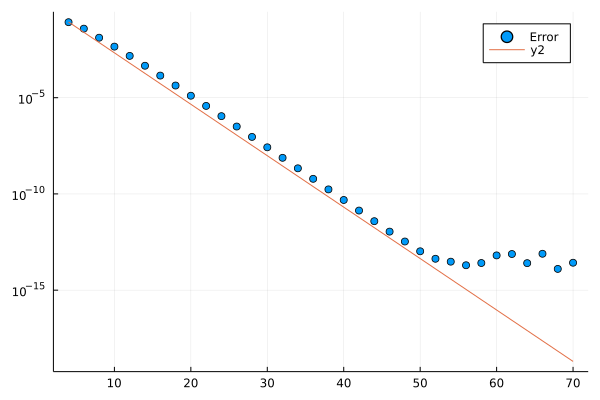

In [5]:
Nv = 4:2:70;
errs = 
[( h = 2π/N;
    column = [0; 0.5*(-1).^(1:N-1).*cot.((1:N-1)*h/2)];
    # Differentiation matrix:
    Dₘ = Toeplitz(column,[column[1]; column[N:-1:2]]);
    # N equally spaced points on [-π, π)
    x = points(Fourier(-π..π),N);
    # maximum error at the set of N points
    norm(Dₘ*f.(x) - Df.(x),Inf) ) for N = Nv]
# plot the error on a semi-log (log-linear) scale
scatter(Nv,errs;yscale=:log10,label="Error")
plot!(Nv,(1.85).^(-Nv))

Note that the error decays linearly on a semi-logarithimc plot (or log-linear plot).  This means that the error decays *exponentially fast* with $N$ (we say that the approximation converges exponentially fast).  That is, the error decays as $\mathcal{O}(c^{-N})$ for $N \to \infty$ with $c > 1$.  Recall that the error of the second-order central difference formula decayed as $\mathcal{O}(N^{-2})$.  This type of converge is  called algebraic convergence.  Note how much faster exponential convergence is compared to algebraic convergence.

To derive finite difference approximations to the derivative, we used low degree polynomials to approximate $f'$ locally.  The idea behind *spectral methods* for differential equations (including PDEs) is to use high degree polynomials (or high accuracy interpolants) to approximate solutions to differential equations.

# Exercises

1. 